# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "06_Python-APIs/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code=[]


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=15)
lngs = np.random.uniform(low=-180.000, high=180.000, size=15)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country_code.append(country)
        
#
       
#print the city count to confirm sufficient count
print(len(cities))
#create data frame to store this information. Columns with additional info can be appended later
weather_df=pd.DataFrame({"City": cities,"Country":country_code})
#created a csv to view list of cities 
weather_df.to_csv("test_cities.csv", index=False)

14


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import openweathermapy.core as owm
from api_keys import api_key
import json


settings = {"units": "metric", "appid": api_key}
weather_data = []
#weather_df["Country"]=""
weather_df["Latitude"]=""
weather_df["Longitude"]=""
weather_df["DateTime"]=""
weather_df["CurrentTemp"]=""
weather_df["MaxTemp"]=""
weather_df["WindSpeed"]=""
weather_df["Cloudiness"]=""
weather_df["Humidity"]= ""




for index, row in weather_df.iterrows():
    #want the city name from my df
    city=row['City'].title()
    country=row['Country'].upper()
    time.sleep(1)

    
    #make API request and print processing message
    print(f"Retrieving record {index+1} of {len(cities)}: {city}, {country}.")
    try:
        weather_response=owm.get_current(city,**settings)
    
        #print(weather_response)
        print(f"The weather in {city} is {weather_response['main']['temp']}C with {weather_response['weather'][0]['description']}.")
        
        #weather_df.loc[index, 'Country']=weather_response['sys']['country']
        weather_df.loc[index, 'Latitude'] = weather_response['coord']['lat']
        weather_df.loc[index, 'Longitude'] = weather_response['coord']['lon']
        weather_df.loc[index, 'DateTime']= weather_response['dt']
        weather_df.loc[index, 'CurrentTemp'] = weather_response['main']['temp']
        weather_df.loc[index, 'MaxTemp']= weather_response['main']['temp_max']
        weather_df.loc[index, 'Humidity']=weather_response['main']['humidity']
        weather_df.loc[index, 'WindSpeed'] = weather_response['wind']['speed']
        weather_df.loc[index, 'Cloudiness']= weather_response['clouds']['all']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
    except:
        print(f'* No weather data available for this city. ({city}, {country}) *') 
        
    print("------------")
    

Retrieving record 1 of 14: Terre Haute, US.
The weather in Terre Haute is 19.09C with scattered clouds.
------------
Retrieving record 2 of 14: Rikitea, PF.
The weather in Rikitea is 24.14C with light rain.
------------
Retrieving record 3 of 14: Punta Arenas, CL.
The weather in Punta Arenas is 15.78C with clear sky.
------------
Retrieving record 4 of 14: Hailey, US.
The weather in Hailey is -1.57C with clear sky.
------------
Retrieving record 5 of 14: Sioux Lookout, CA.
The weather in Sioux Lookout is -0.59C with light snow.
------------
Retrieving record 6 of 14: Lagoa, PT.
The weather in Lagoa is 15.41C with clear sky.
------------
Retrieving record 7 of 14: Acapulco, MX.
The weather in Acapulco is 29C with clear sky.
------------
Retrieving record 8 of 14: Trastenik, BG.
The weather in Trastenik is 5C with broken clouds.
------------
Retrieving record 9 of 14: Vaini, TO.
The weather in Vaini is 19.36C with clear sky.
------------
Retrieving record 10 of 14: Georgetown, SH.
The we

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.to_csv("weather_data.csv", index=False)

In [5]:
weather_df.head(10)

,City,Country,Latitude,Longitude,DateTime,CurrentTemp,MaxTemp,WindSpeed,Cloudiness,Humidity
0,terre haute,us,39.47,-87.41,1552599906,19.09,21.67,10.8,40,55
1,rikitea,pf,-23.12,-134.97,1552599860,24.14,24.14,8.38,100,100
2,punta arenas,cl,-53.16,-70.91,1552599912,15.78,16,5.1,0,55
3,hailey,us,43.52,-114.32,1552599981,-1.57,-1.11,3.1,5,63
4,sioux lookout,ca,50.1,-91.92,1552597200,-0.59,0,7.7,90,84
5,lagoa,pt,37.14,-8.45,1552600028,15.41,16.67,3.6,0,58
6,acapulco,mx,16.86,-99.88,1552596480,29,29,4.1,5,79
7,trastenik,bg,43.52,24.47,1552597200,5,5,2.1,75,93
8,vaini,to,15.34,74.49,1552600147,19.36,19.36,0.98,0,71
9,georgetown,sh,6.8,-58.16,1552597200,29,29,4.1,40,70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

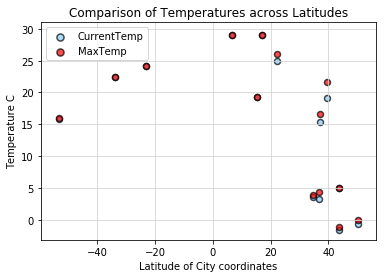

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["CurrentTemp"],color='lightskyblue', edgecolor='k',
            linewidth= 1.5, marker='o', alpha=0.7)
plt.scatter(weather_df["Latitude"],weather_df["MaxTemp"],color='red', edgecolor='k',
            linewidth= 1.5, marker='o', alpha=0.7)

plt.title("Comparison of Temperatures across Latitudes")
plt.ylabel("Temperature C")
plt.xlabel("Latitude of City coordinates")
plt.grid(b=True, which='major', color='lightgray', linestyle='-')

leg=plt.legend(("CurrentTemp","MaxTemp"))
leg.legendHandles[0]._sizes=[50]
leg.legendHandles[1]._sizes=[50]


#### Latitude vs. Humidity Plot

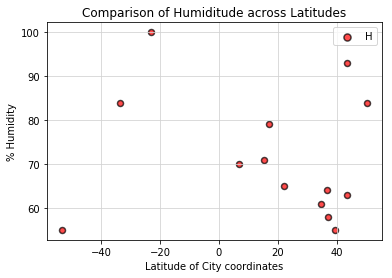

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],color='red', edgecolor='k',
            linewidth= 1.5, marker='o', alpha=0.7)

plt.title("Comparison of Humiditude across Latitudes")
plt.ylabel("% Humidity")
plt.xlabel("Latitude of City coordinates")
plt.grid(b=True, which='major', color='lightgray', linestyle='-')

leg=plt.legend(("Humidity"))
leg.legendHandles[0]._sizes=[50]


#### Latitude vs. Cloudiness Plot

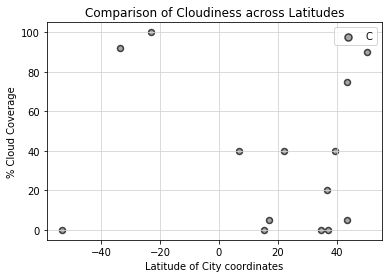

In [16]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],color='gray', edgecolor='k',
            linewidth= 1.5, marker='o', alpha=0.7)

plt.title("Comparison of Cloudiness across Latitudes")
plt.ylabel("% Cloud Coverage")
plt.xlabel("Latitude of City coordinates")
plt.grid(b=True, which='major', color='lightgray', linestyle='-')

leg=plt.legend(("Cloudiness"))
leg.legendHandles[0]._sizes=[50]


#### Latitude vs. Wind Speed Plot

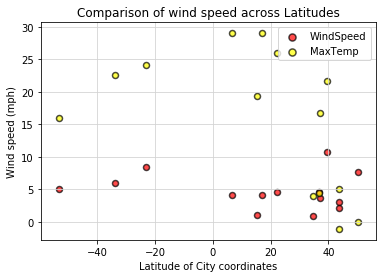

In [15]:
plt.scatter(weather_df["Latitude"],weather_df["WindSpeed"],color='yellow', edgecolor='k',
            linewidth= 1.5, marker='o', alpha=0.7)

plt.title("Comparison of wind speed across Latitudes")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude of City coordinates")
plt.grid(b=True, which='major', color='lightgray', linestyle='-')

leg=plt.legend(("WindSpeed"))
leg.legendHandles[0]._sizes=[50]


AttributeError: 'float' object has no attribute 'sqrt'

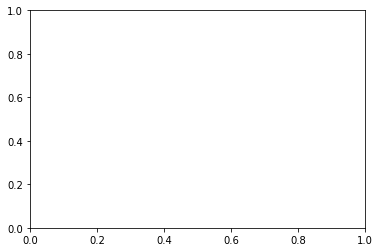

In [14]:
plt.scatter(weather_df["Latitude"],weather_df["Longitude"],color='red', edgecolor='k',
            linewidth= 1.5, marker='o',s=weather_df["MaxTemp"], alpha=0.7)

